In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the CSV file
df = pd.read_csv('../Data/raw_analyst_ratings.csv')


In [2]:
# Obtain basic statistics for textual lengths (like headline length)
df['headline_length'] = df['headline'].apply(len)
headline_length_stats = df['headline_length'].describe()

print("Basic Statistics for Headline Lengths:")
print(headline_length_stats)


Basic Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [3]:
# Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()

print("\nNumber of Articles per Publisher:")
print(articles_per_publisher)



Number of Articles per Publisher:
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: publisher, Length: 1034, dtype: int64


In [5]:
# Analyze the publication dates to see trends over time
df['date'] = pd.to_datetime(df['date'], utc=True)
df['day_of_week'] = df['date'].dt.day_name()

articles_per_day = df['day_of_week'].value_counts()

print("\nNumber of Articles per Day of the Week:")
print(articles_per_day)




Number of Articles per Day of the Week:
Thursday     302619
Wednesday    300922
Tuesday      296505
Monday       265139
Friday       217918
Sunday        16466
Saturday       7759
Name: day_of_week, dtype: int64


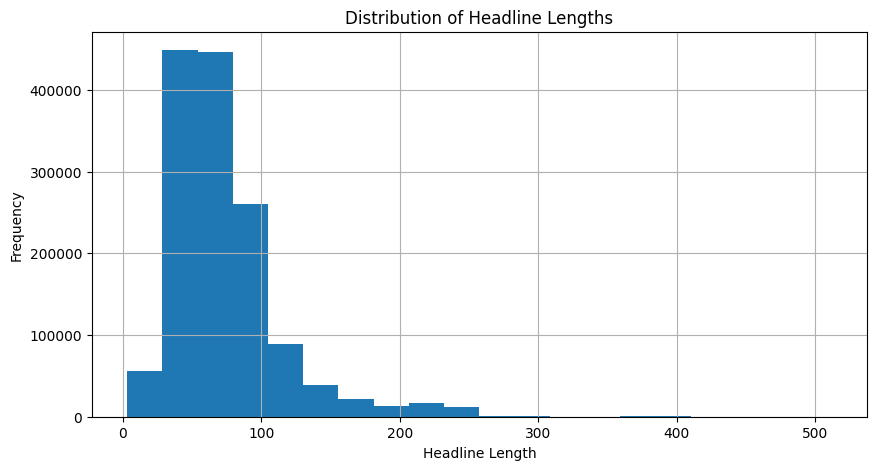

In [6]:
# Plot headline lengths
plt.figure(figsize=(10, 5))
df['headline_length'].hist(bins=20)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


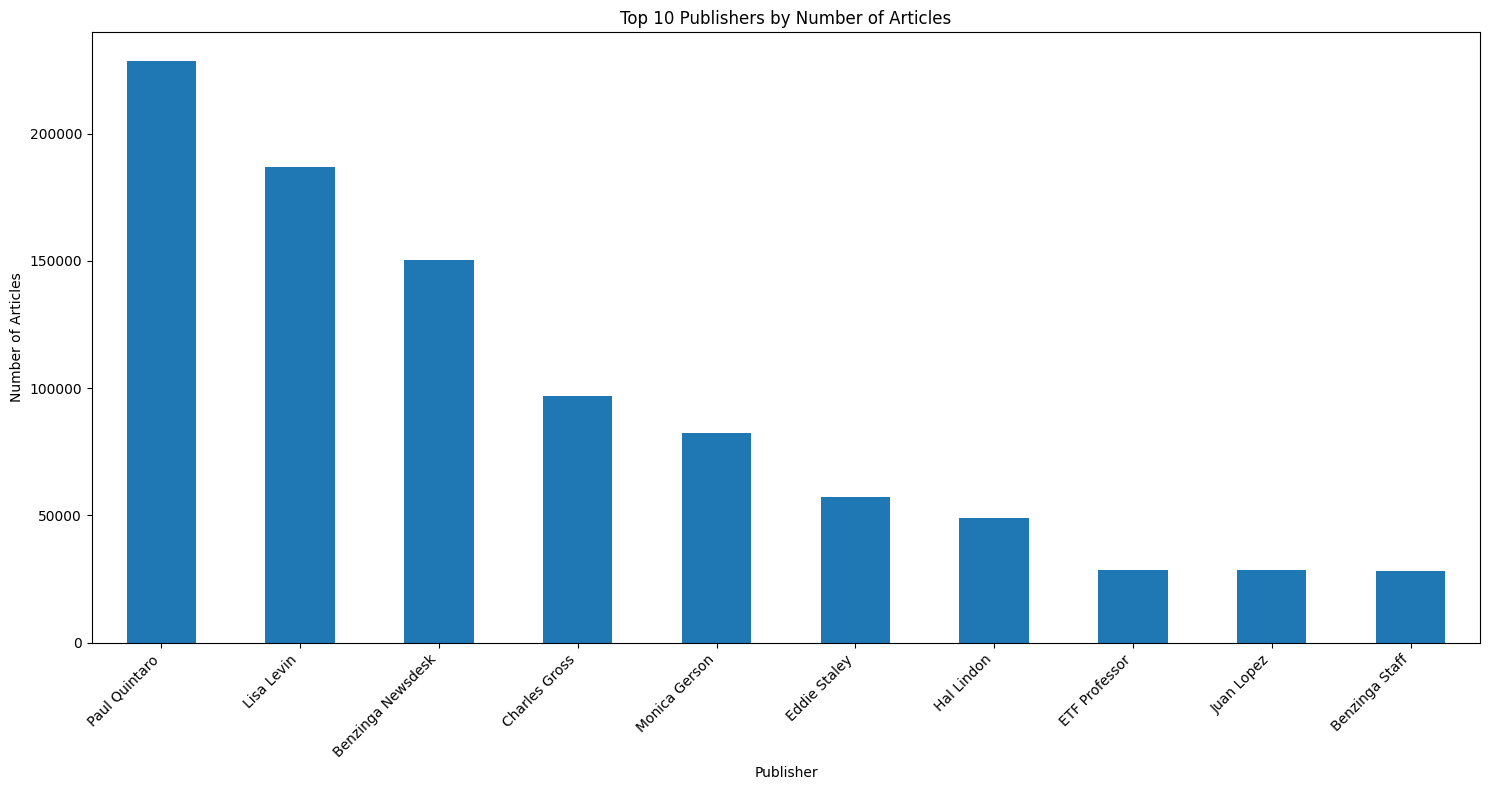

In [10]:
# Plot articles per publisher (top 10)
top_n = 10  # Change this to display more or fewer publishers
top_publishers = articles_per_publisher.head(top_n)

plt.figure(figsize=(15, 8))
top_publishers.plot(kind='bar')
plt.title(f'Top {top_n} Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [ ]:
import plotly.express as px

fig = px.bar(articles_per_publisher, title='Number of Articles per Publisher')
fig.update_layout(
    xaxis_title="Publisher",
    yaxis_title="Number of Articles",
    xaxis_tickangle=-45,
    title_x=0.5
)
fig.show()


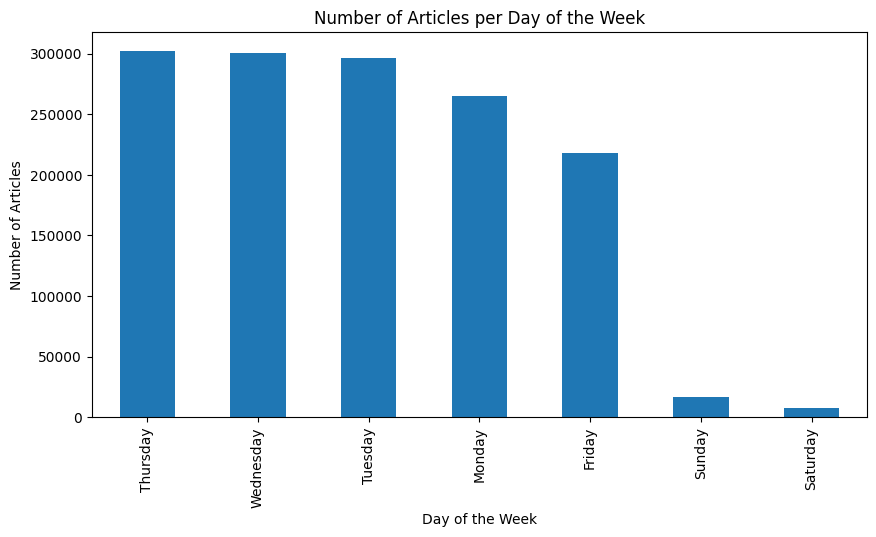

In [8]:
# Plot articles per day of the week
plt.figure(figsize=(10, 5))
articles_per_day.plot(kind='bar')
plt.title('Number of Articles per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()
